# Price rate-of-change (ROC)

FF-16	Price rate-of-change (ROC)

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

A momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago. The ROC indicator is plotted against zero, with the indicator moving upwards into positive territory if price changes are to the upside, and moving into negative territory if price changes are to the downside.
https://www.investopedia.com/terms/p/pricerateofchange.asp

Select an n value. It can be anything such as 12, 25, or 200. Short-term trader traders typically use a smaller number while longer-term investors use a larger number.

```
ROC - Rate of change : ((price/prevPrice)-1)*100
real = ROC(close, timeperiod=10)
```  
https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html


In [2]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

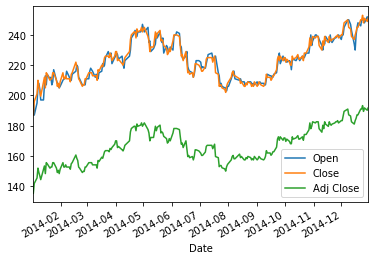

In [3]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

In [4]:

from ta import add_all_ta_features
from ta.utils import dropna

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

roc_10 = ROC(inputs, timeperiod=10)
roc_12 = ROC(inputs, timeperiod=12)
roc_25 = ROC(inputs, timeperiod=25)
roc_100 = ROC(inputs, timeperiod=100)

daily = add_all_ta_features(daily, open="Open", high="High", low="Low", close="Close", volume="Volume")

slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

daily.loc[:,("ROC-10")] = roc_10.tolist()
daily.loc[:,("ROC-12")] = roc_12.tolist()
daily.loc[:,("ROC-25")] = roc_25.tolist()
daily.loc[:,("ROC-100")] = roc_100.tolist()
daily.tail()



/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,ROC-10,ROC-12,ROC-25,ROC-100
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,-5.005559e+06,213623400.0,0.222698,6.340093e+06,...,4.009376,11.660023,-7.650647,1.200000,1.192857,35.294118,3.265306,2.016129,7.659574,22.815534
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,-5.596826e+06,211849600.0,0.194908,4.167365e+06,...,-2.532403,8.821538,-11.353940,-1.976285,-1.996074,32.620321,1.639344,-0.800000,3.765690,19.230769
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,-3.144126e+06,214302300.0,0.206448,4.623184e+06,...,-7.243628,5.608505,-12.852132,1.209677,1.202419,34.224599,5.020921,2.448980,5.907173,20.095694
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,-4.513626e+06,212019800.0,0.188726,3.310587e+06,...,-11.512135,2.184377,-13.696512,-0.796813,-0.800004,33.155080,5.063291,2.049180,5.508475,17.452830
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,-3.132066e+06,214322400.0,0.217800,3.495531e+06,...,-15.084623,-1.269423,-13.815199,0.803213,0.800004,34.224599,4.583333,5.020921,5.907173,16.744186


# Plot of ADX on the original time-series

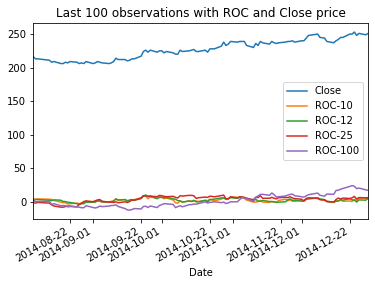

In [6]:
daily[['Close','ROC-10', 'ROC-12','ROC-25','ROC-100']][-100:].plot(title="Last 100 observations with ROC and Close price")

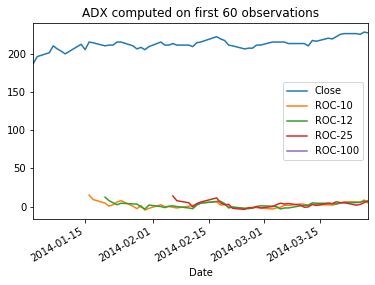

In [8]:
daily[['Close','ROC-10', 'ROC-12','ROC-25','ROC-100']][:60].plot(title="ADX computed on first 60 observations")

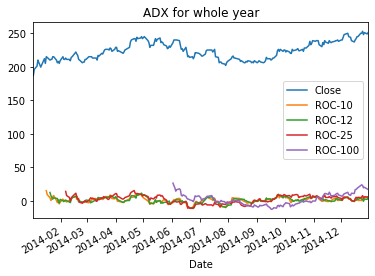

In [9]:
daily[['Close','ROC-10', 'ROC-12','ROC-25','ROC-100']].plot(title="ADX for whole year")

In [9]:
daily.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
     

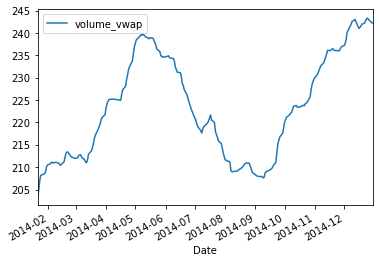

In [12]:
daily[['volume_vwap']].dropna().plot()

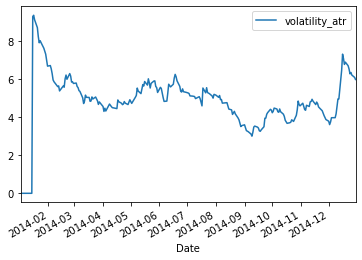

In [10]:
daily[['volatility_atr']].dropna().plot()

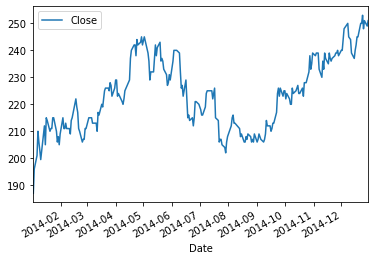

In [11]:
daily[['Close']].dropna().plot()